# Lecture 11

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import rcParams
rcParams['animation.html'] = 'jshtml'
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4
import time
import os
import glob

### OMB Exercise 7: Long Waves in a Layered Fluid

Modified to be a uniform density of $\rho = 1028$ kg/m$^3$ with a flat bottom. Total depth of $H= 100$ m.  50 vertical layers.

Forced with a wave maker of period $T = 8$ s.

Shallow water wave speed:

$ c = \sqrt{g H} $

Shallow water wave length:

$ \lambda = c / T$

In [124]:
g = 9.81; H = 100; T = 8;

c = np.sqrt(g*H)
λ = c * T
print(f'c = {c:.2f} m/s, λ = {λ:.2f} m')

c = 31.32 m/s, λ = 250.57 m


In [108]:
ds.close()

In [109]:
filename = 'src/OMB_Ex7/output.nc'
ds = xr.open_dataset(filename)

In [110]:
ds

<xarray.Dataset>
Dimensions:  (time: 101, x: 101, z: 51)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-01T00:01:40
  * x        (x) float32 2.5 7.5 12.5 17.5 22.5 ... 487.5 492.5 497.5 502.5
  * z        (z) float32 1.0 3.0 5.0 7.0 9.0 11.0 ... 93.0 95.0 97.0 99.0 101.0
Data variables:
    h        (time, x, z) float32 ...
    u        (time, x, z) float32 ...
    dp       (time, x, z) float32 ...
    eta      (time, x, z) float32 ...

In [111]:
t = (ds.time - ds.time[0]).dt.seconds.values

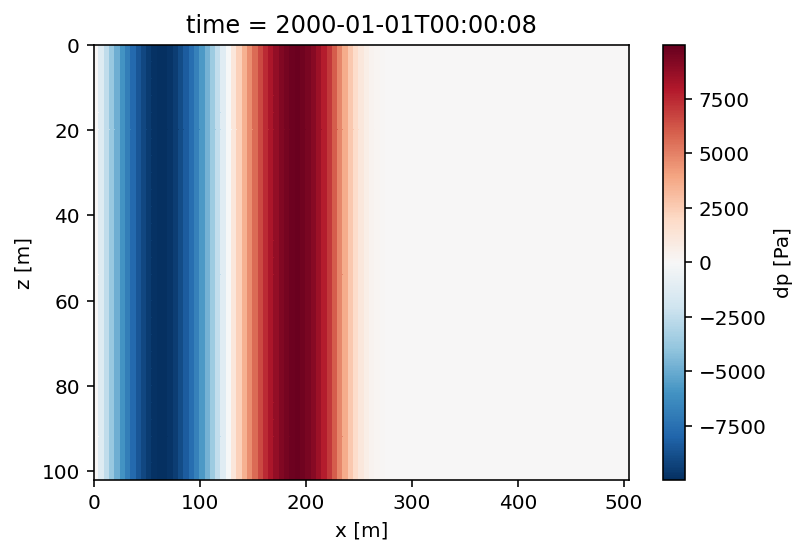

In [112]:
ds.dp[8].plot(x='x')
plt.gca().invert_yaxis()

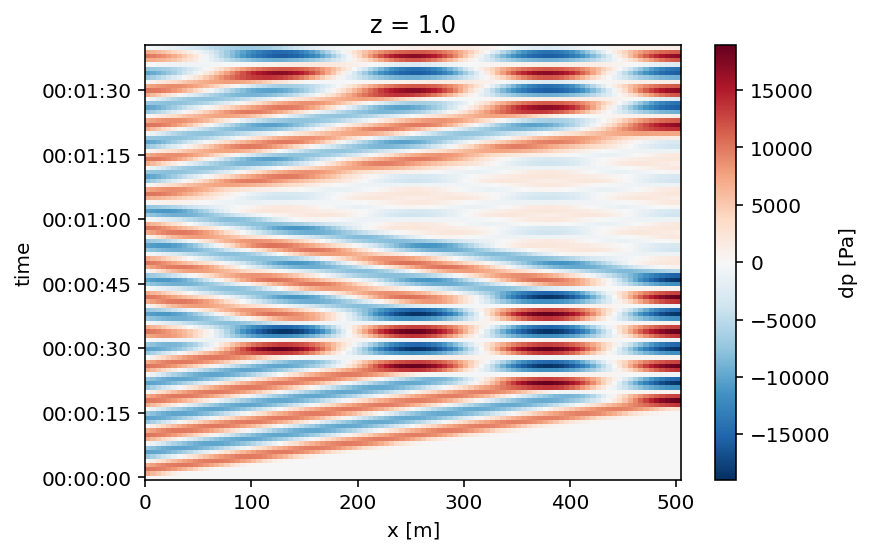

In [113]:
ds.dp.isel(z=0).plot()

### Exercise 3: Short Surface Gravity Waves

Same set up as above but with a non-hydrostatic solver.

Deep water wave speed:

$ c = g \frac{T}{2 \pi} $

Deep water wave length:

$ \lambda = c T$

In [126]:
g = 9.81; H = 100; T = 8;

c = g * T / (2*np.pi)
λ = c * T
print(f'c = {c:.2f} m/s, λ = {λ:.2f} m')

c = 12.49 m/s, λ = 99.92 m


In [131]:
ds.close()

In [132]:
filename = 'src/AOM_Ex3/output.nc'
ds = xr.open_dataset(filename)

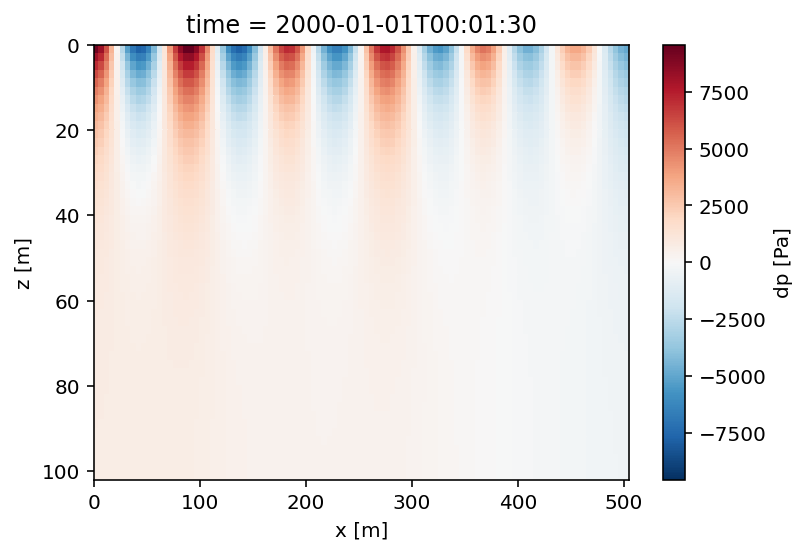

In [135]:
ds.dp[90].plot(x='x')
plt.gca().invert_yaxis()

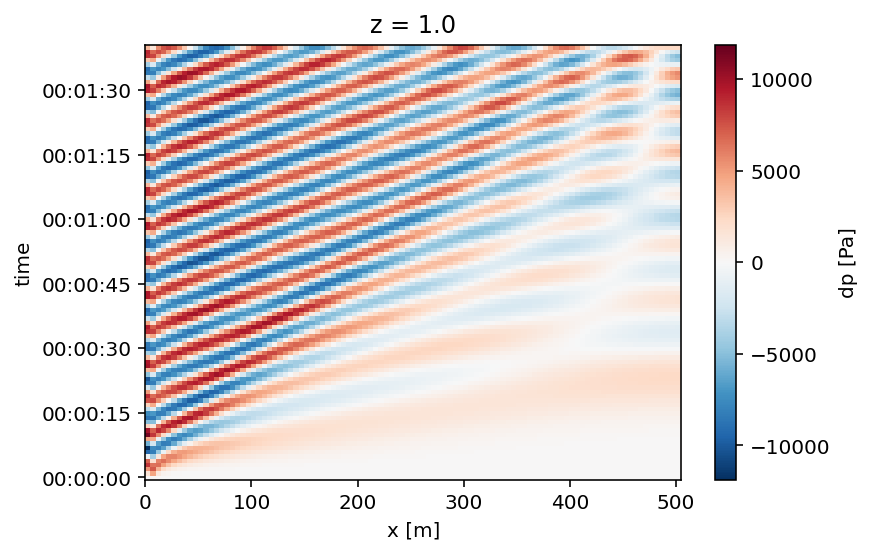

In [136]:
ds.dp.isel(z=0).plot()